In [47]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [48]:
import yfinance as yf

# Define the ticker symbol for Adidas on Yahoo Finance
ticker_symbol = "ADS.DE"

# Define the start and end dates for the historical data
start_date = "2020-01-01"
end_date = "2023-07-10"

# Fetch historical data using yfinance
df = yf.download(ticker_symbol, start=start_date, end=end_date)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,289.200012,293.250000,289.200012,291.549988,276.475128,429314
2020-01-03,290.000000,292.250000,288.350006,291.950012,276.854492,440067
2020-01-06,288.950012,290.649994,285.149994,289.649994,274.673401,494435
2020-01-07,290.549988,296.500000,290.500000,294.750000,279.509705,489629
2020-01-08,294.000000,302.850006,293.500000,302.850006,287.190887,686646


In [49]:
#Get the number of rows and columns in the data set

df.shape

(894, 6)

In [50]:
# Calculate the number of missing values in each column

df.isnull().sum()



Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

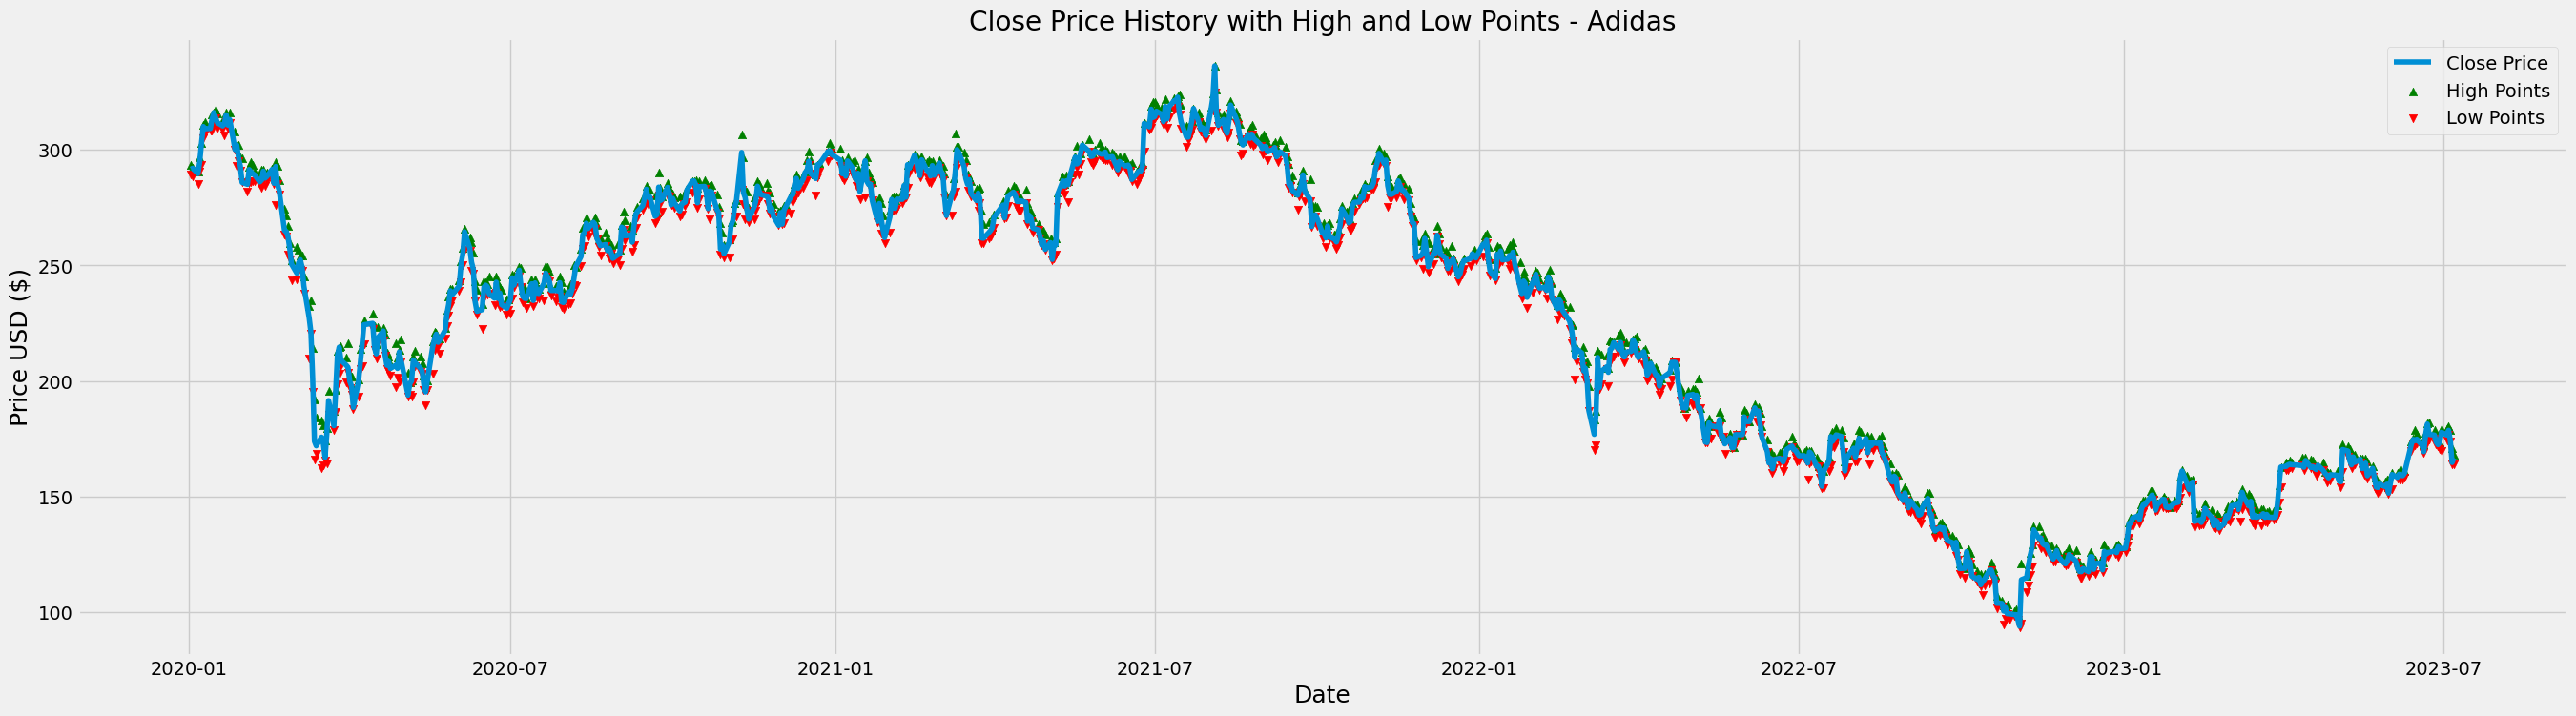

In [51]:
# Plotting high and low points
plt.figure(figsize=(30, 8))
plt.title('Close Price History with High and Low Points - Adidas')
plt.plot(df['Close'], label='Close Price')
plt.scatter(df.index, df['High'], color='green', marker='^', label='High Points')
plt.scatter(df.index, df['Low'], color='red', marker='v', label='Low Points')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend()
plt.show()

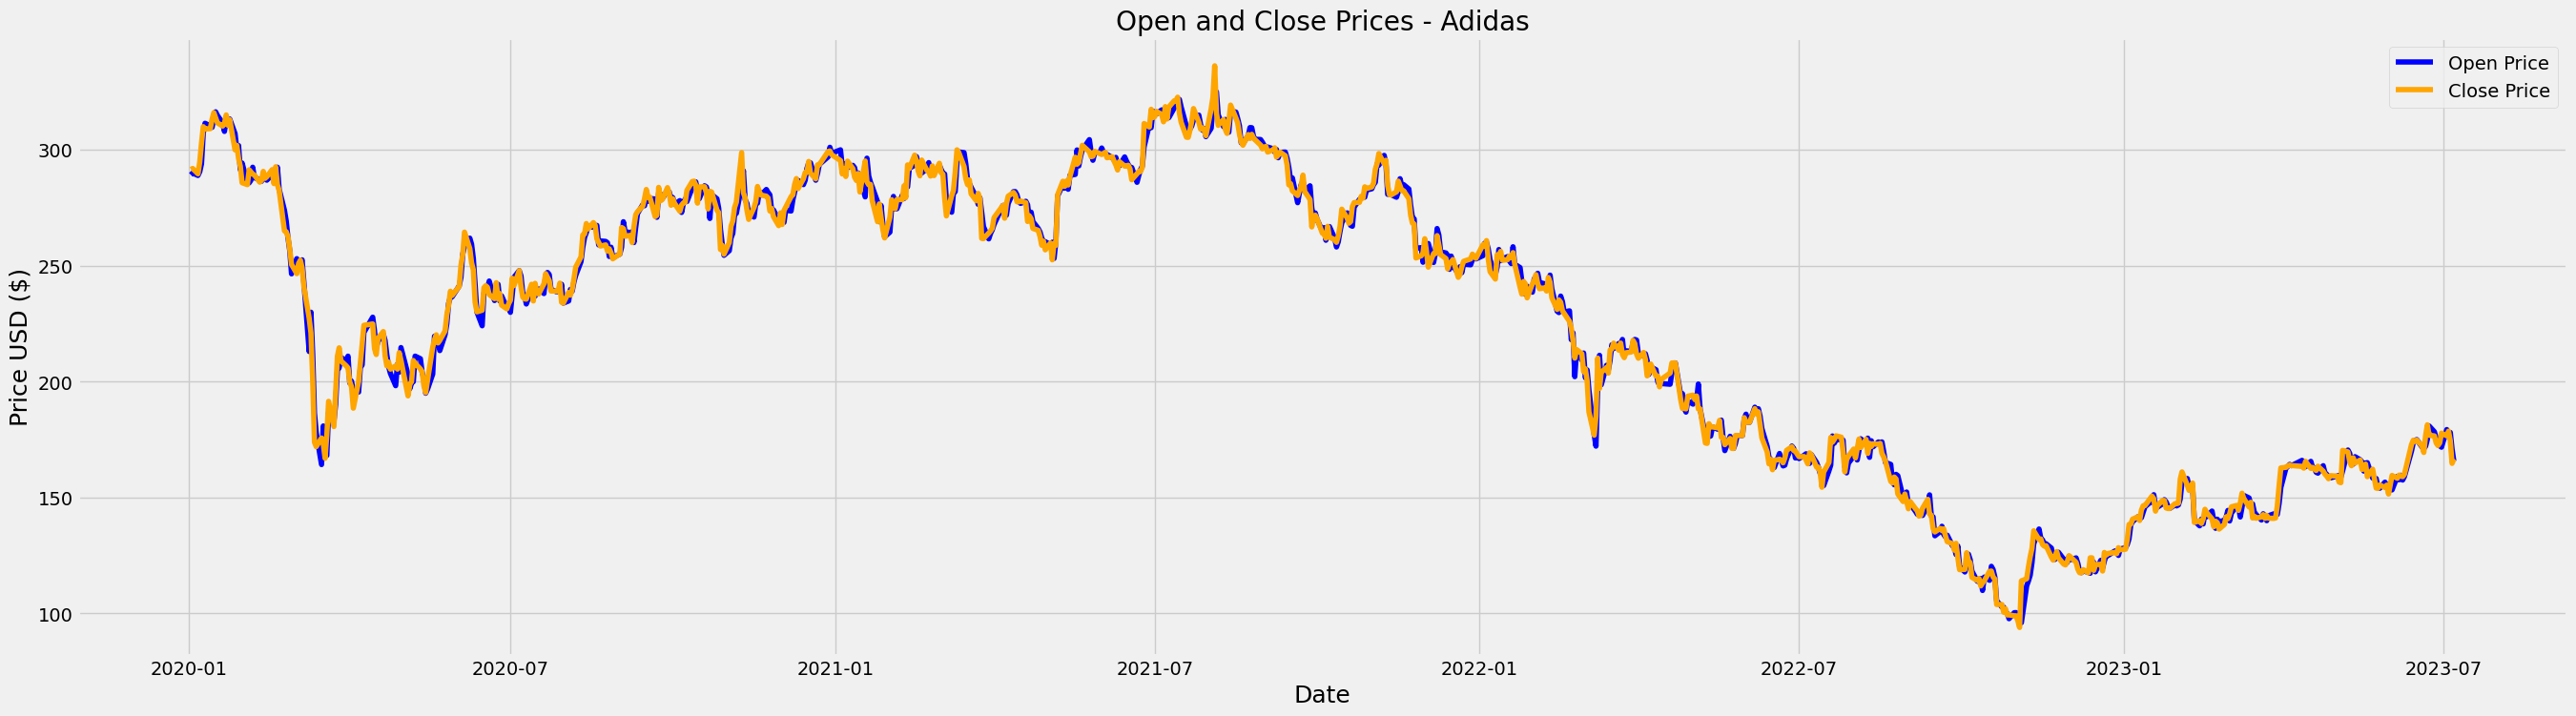

In [52]:

# Plotting open and close values
plt.figure(figsize=(30, 8))
plt.title('Open and Close Prices - Adidas')
plt.plot(df['Open'], label='Open Price', color='blue')
plt.plot(df['Close'], label='Close Price', color='orange')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend()
plt.show()



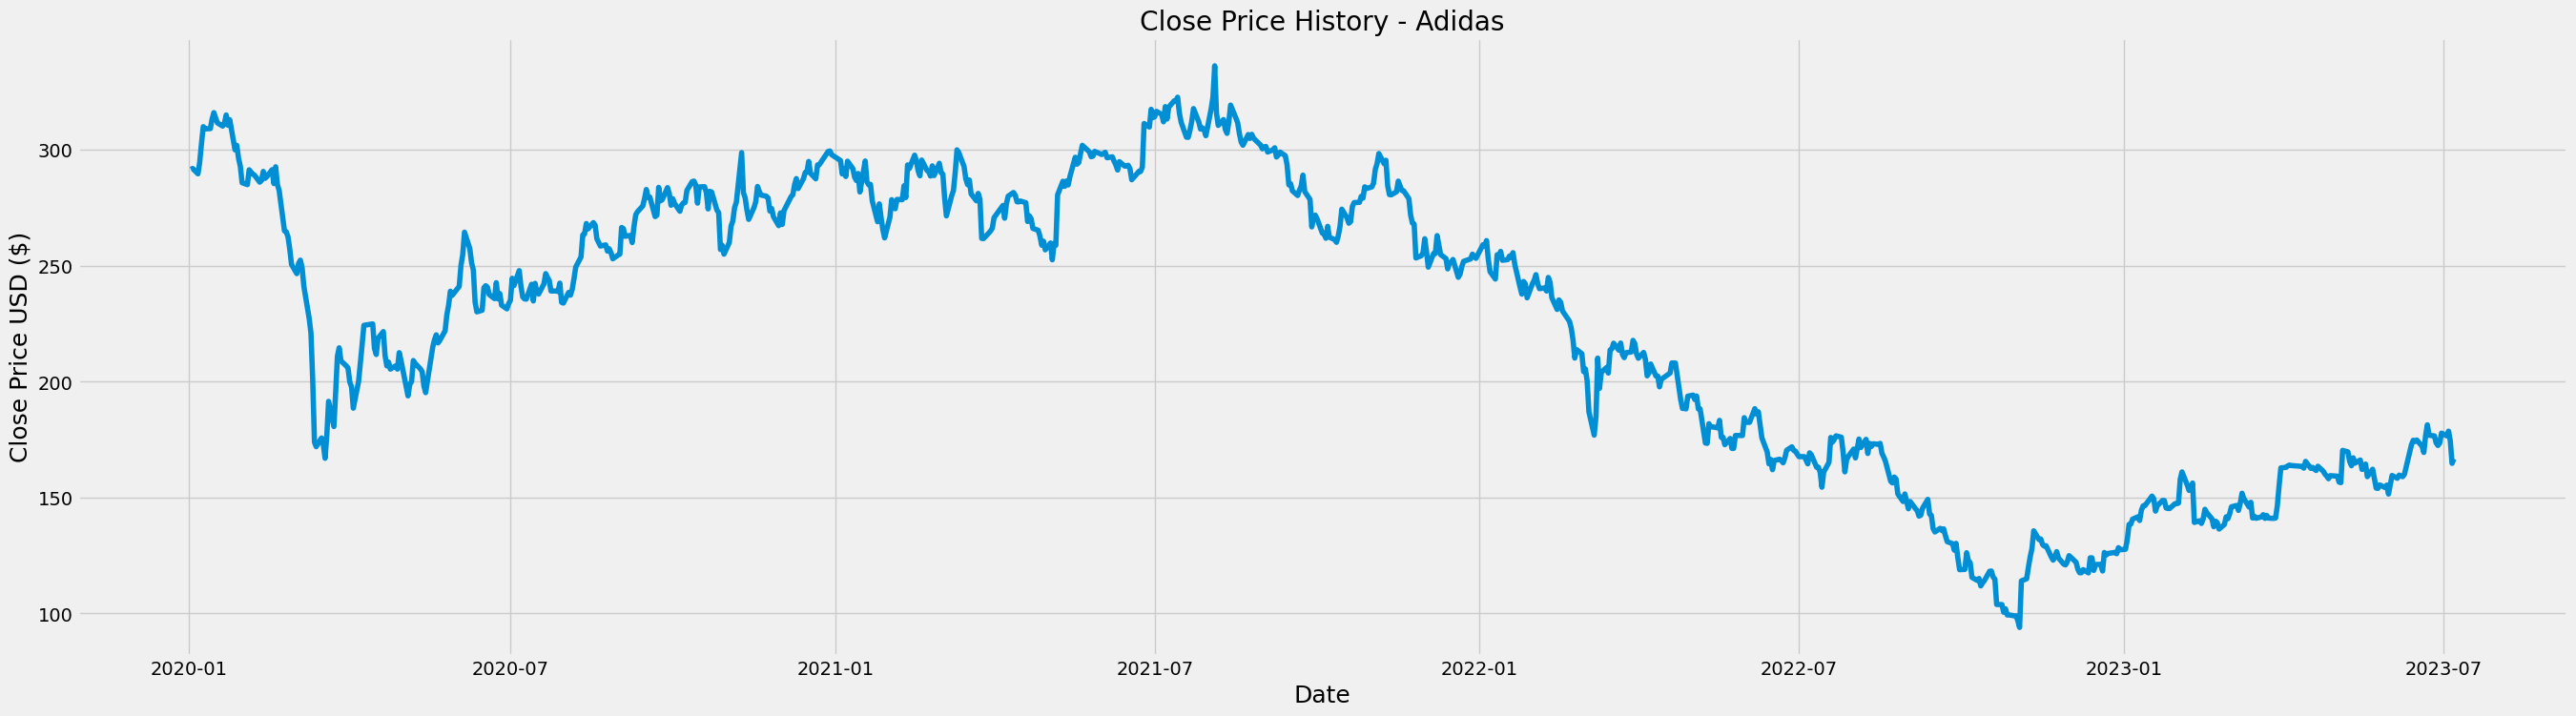

In [53]:
#Visualize the closing price history

plt.figure(figsize=(30,8))

plt.title('Close Price History - Adidas')

plt.plot(df['Close'])

plt.xlabel('Date', fontsize=18)

plt.ylabel('Close Price USD ($)', fontsize=18)

plt.show()

In [54]:
#Creating a new dataframe with only the 'Close column

data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#Getting the number of rows to train the model on

training_data_len  = math.ceil( len(dataset) * .8 )

training_data_len

716

In [55]:
#Scale the data

scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.8155179 ],
       [0.81716885],
       [0.80767641],
       [0.82872472],
       [0.86215438],
       [0.89166323],
       [0.88774242],
       [0.88815516],
       [0.90507635],
       [0.91663222],
       [0.90775895],
       [0.89847294],
       [0.89269501],
       [0.8978539 ],
       [0.91250511],
       [0.89413952],
       [0.90404457],
       [0.85039208],
       [0.85844   ],
       [0.8351217 ],
       [0.82108954],
       [0.79178699],
       [0.78848535],
       [0.81489886],
       [0.81097818],
       [0.80747011],
       [0.80540655],
       [0.79281877],
       [0.79591411],
       [0.81200996],
       [0.79962861],
       [0.80251752],
       [0.81510529],
       [0.7903426 ],
       [0.82026419],
       [0.78848535],
       [0.77796126],
       [0.70614935],
       [0.70449853],
       [0.69562526],
       [0.67354517],
       [0.64630625],
       [0.63000416],
       [0.64816344],
       [0.65394137],
       [0.64032194],
       [0.60709866],
       [0.550

In [56]:
#Create the scaled training data set

train_data = scaled_data[0: training_data_len, :]

 #Split the data into x_train and y_train data sets

x_train = []

y_train = []

for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])

   if i<= 60:

      print(x_train)

      print(y_train)

      print()

[array([0.8155179 , 0.81716885, 0.80767641, 0.82872472, 0.86215438,
       0.89166323, 0.88774242, 0.88815516, 0.90507635, 0.91663222,
       0.90775895, 0.89847294, 0.89269501, 0.8978539 , 0.91250511,
       0.89413952, 0.90404457, 0.85039208, 0.85844   , 0.8351217 ,
       0.82108954, 0.79178699, 0.78848535, 0.81489886, 0.81097818,
       0.80747011, 0.80540655, 0.79281877, 0.79591411, 0.81200996,
       0.79962861, 0.80251752, 0.81510529, 0.7903426 , 0.82026419,
       0.78848535, 0.77796126, 0.70614935, 0.70449853, 0.69562526,
       0.67354517, 0.64630625, 0.63000416, 0.64816344, 0.65394137,
       0.64032194, 0.60709866, 0.55035082, 0.52434999, 0.44098227,
       0.32988034, 0.32187373, 0.33739166, 0.32624846, 0.30115559,
       0.3430871 , 0.40260009, 0.35769706, 0.4183657 , 0.48307883])]
[0.49793647394012347]



In [57]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
#shape of the data
x_train.shape

(656, 60)

In [59]:
#Reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(656, 60, 1)

In [60]:
#Build the LSTM model

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(50, return_sequences= False))

model.add(Dense (25))

model.add(Dense (1))

In [61]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
#Train the model

history = model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
656/656 [==============================] - 26s 34ms/step - loss: 0.0064
Epoch 2/10
656/656 [==============================] - 21s 32ms/step - loss: 0.0021
Epoch 3/10
656/656 [==============================] - 20s 31ms/step - loss: 0.0018
Epoch 4/10
656/656 [==============================] - 22s 33ms/step - loss: 0.0014
Epoch 5/10
656/656 [==============================] - 22s 33ms/step - loss: 0.0011
Epoch 6/10
656/656 [==============================] - 21s 32ms/step - loss: 9.4322e-04
Epoch 7/10
656/656 [==============================] - 22s 33ms/step - loss: 0.0011
Epoch 8/10
656/656 [==============================] - 22s 33ms/step - loss: 8.4932e-04
Epoch 9/10
656/656 [==============================] - 21s 32ms/step - loss: 7.8328e-04
Epoch 10/10
656/656 [==============================] - 27s 41ms/step - loss: 9.0409e-04


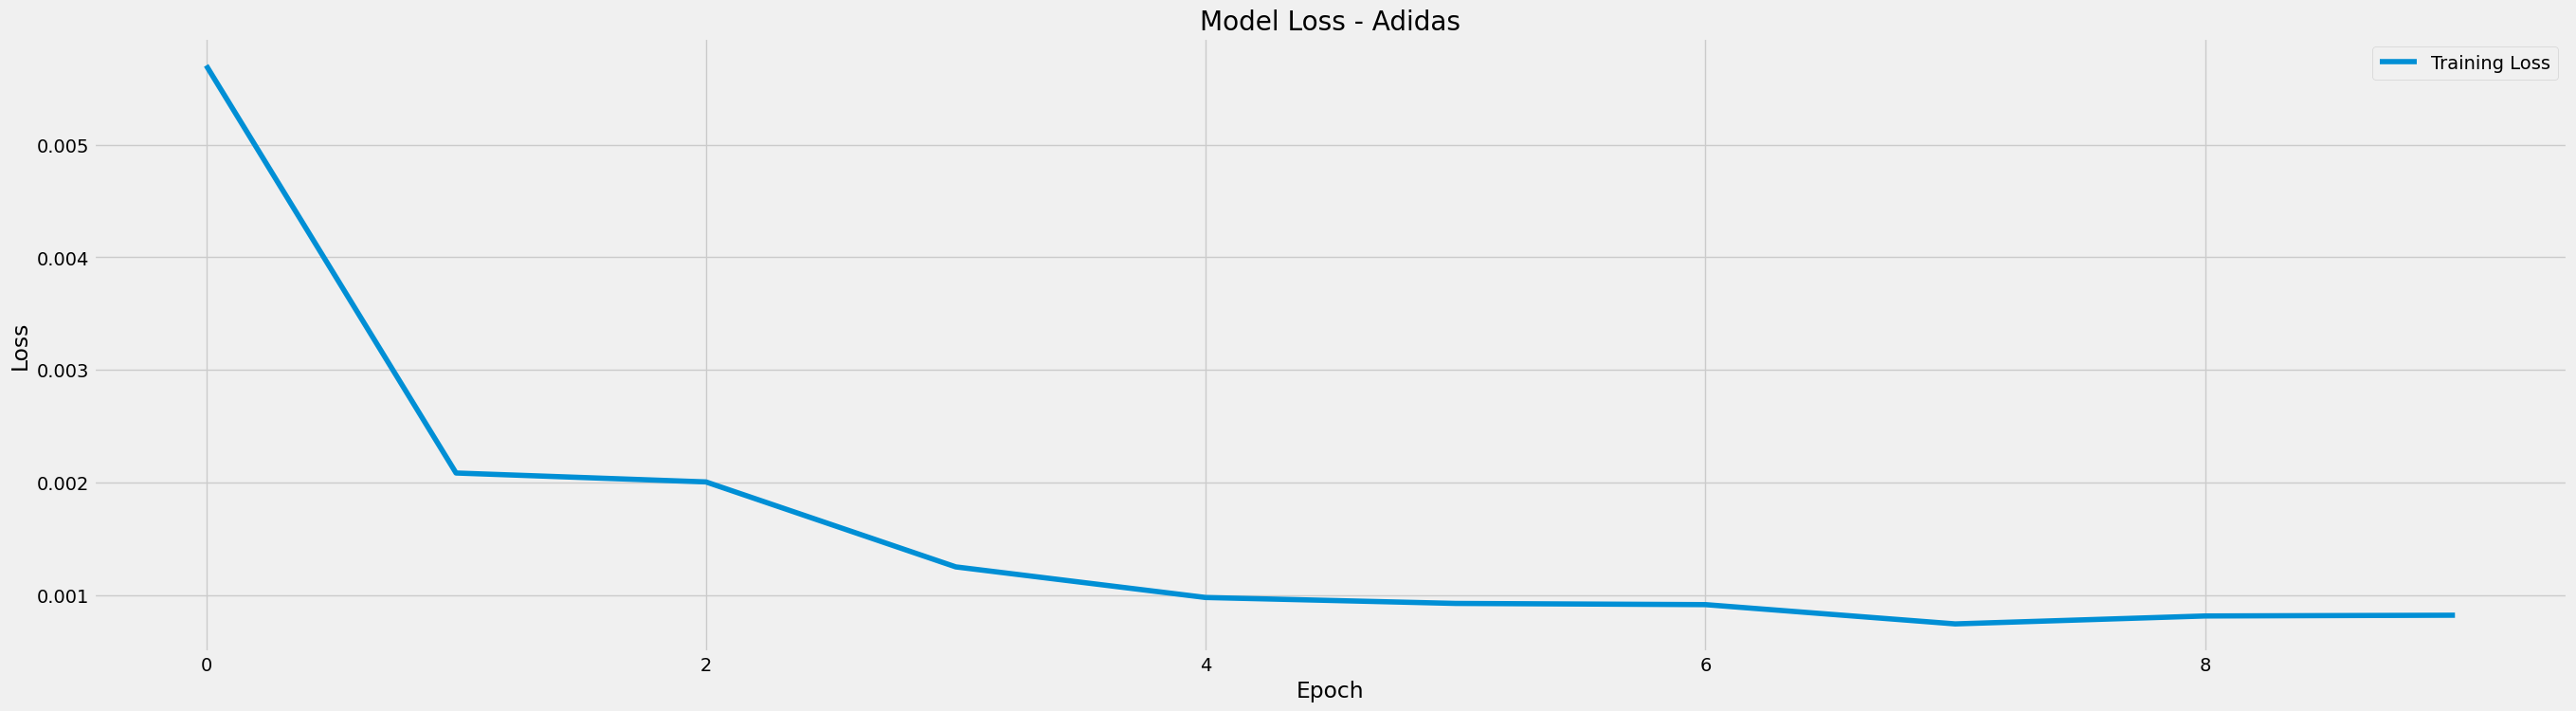

In [19]:
# Plot the model loss over epochs
plt.figure(figsize=(30,8))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss - Adidas')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
#Create the testing data set

#Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test

x_test = []

y_test = dataset [training_data_len:, :]

for i in range (60, len(test_data)):

  x_test.append(test_data[i-60:i, 0])

In [22]:
#Convert the data to a numpy array

x_test = np.array(x_test)

In [23]:
#Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
#Get the models predicted price values predictions

predictions= model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 18ms/step


In [25]:
predictions

array([[112.82361 ],
       [106.370705],
       [103.162186],
       [100.412125],
       [100.02143 ],
       [ 98.66743 ],
       [ 97.85317 ],
       [ 97.24227 ],
       [ 96.87129 ],
       [ 95.57222 ],
       [ 93.326706],
       [102.42692 ],
       [108.4012  ],
       [113.284645],
       [117.67548 ],
       [121.50722 ],
       [127.58422 ],
       [128.11037 ],
       [128.11302 ],
       [126.86508 ],
       [126.10055 ],
       [126.14082 ],
       [123.48425 ],
       [121.536285],
       [121.63221 ],
       [123.23119 ],
       [122.39662 ],
       [120.21224 ],
       [119.00352 ],
       [119.35287 ],
       [121.15302 ],
       [121.597466],
       [120.34196 ],
       [117.96318 ],
       [116.08081 ],
       [115.38658 ],
       [115.99546 ],
       [115.56864 ],
       [118.92409 ],
       [120.60888 ],
       [117.97563 ],
       [117.926155],
       [118.23026 ],
       [116.78781 ],
       [120.608055],
       [122.02023 ],
       [122.72911 ],
       [123.2

In [26]:
#Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 25.114285416252


In [27]:
# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE for LSTM: {rmse_lstm}')


RMSE for LSTM: 5.011415510237801


To find the accuracy of your regression-based LSTM model, you can use a metric called R-squared (R2) or the coefficient of determination. R-squared measures the proportion of the variance in the dependent variable (in this case, your stock prices) that is predictable from the independent variables (the model's predictions). A higher R-squared value indicates a better fit of the model to the data.



In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Value:", r2)


R-squared (R2) Value: 0.9366660429509612


In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions


<ipython-input-29-1fc469ad31c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [46]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-10-21,103.860001,112.823608
2022-10-24,103.820000,106.370705
2022-10-25,100.500000,103.162186
2022-10-26,102.000000,100.412125
2022-10-27,99.339996,100.021431
...,...,...
2023-07-03,176.619995,176.226868
2023-07-04,178.639999,176.471008
2023-07-05,174.419998,177.729095


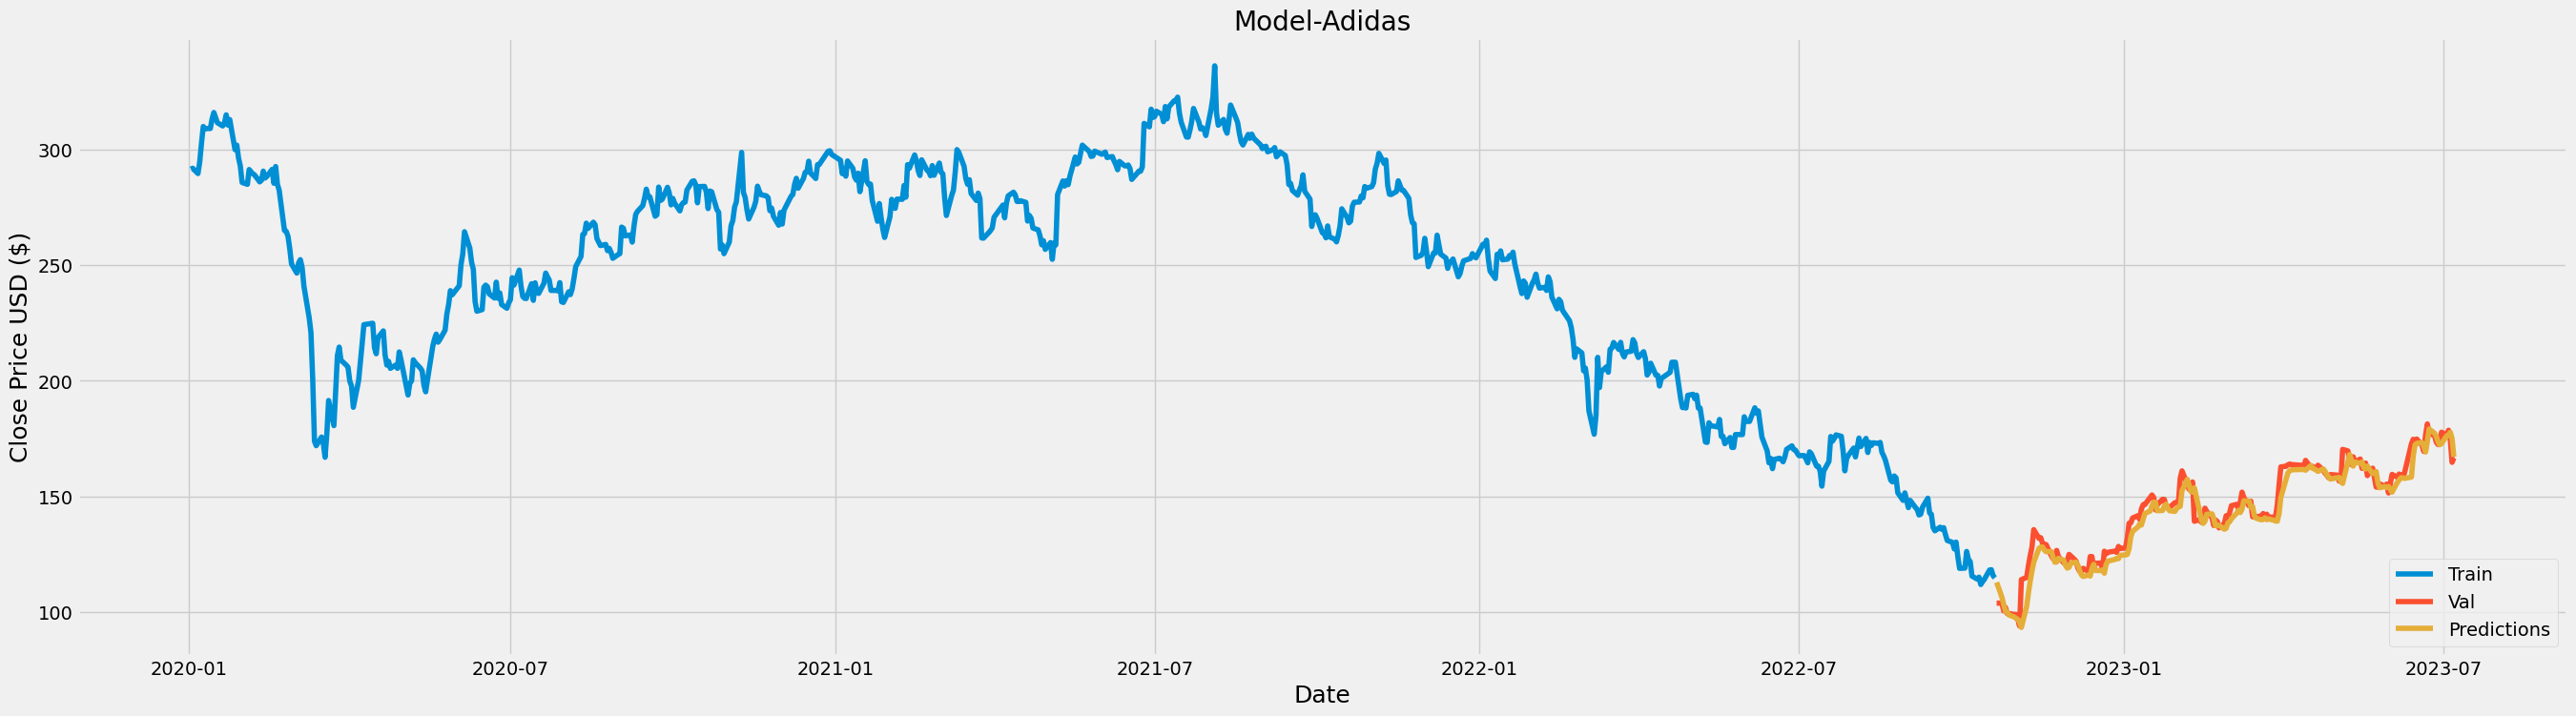

In [31]:
#Plot the actual value/Predicted value

plt.figure(figsize=(30,8))

plt.title('Model-Adidas')

plt.xlabel('Date', fontsize=18)

plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train[ 'Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

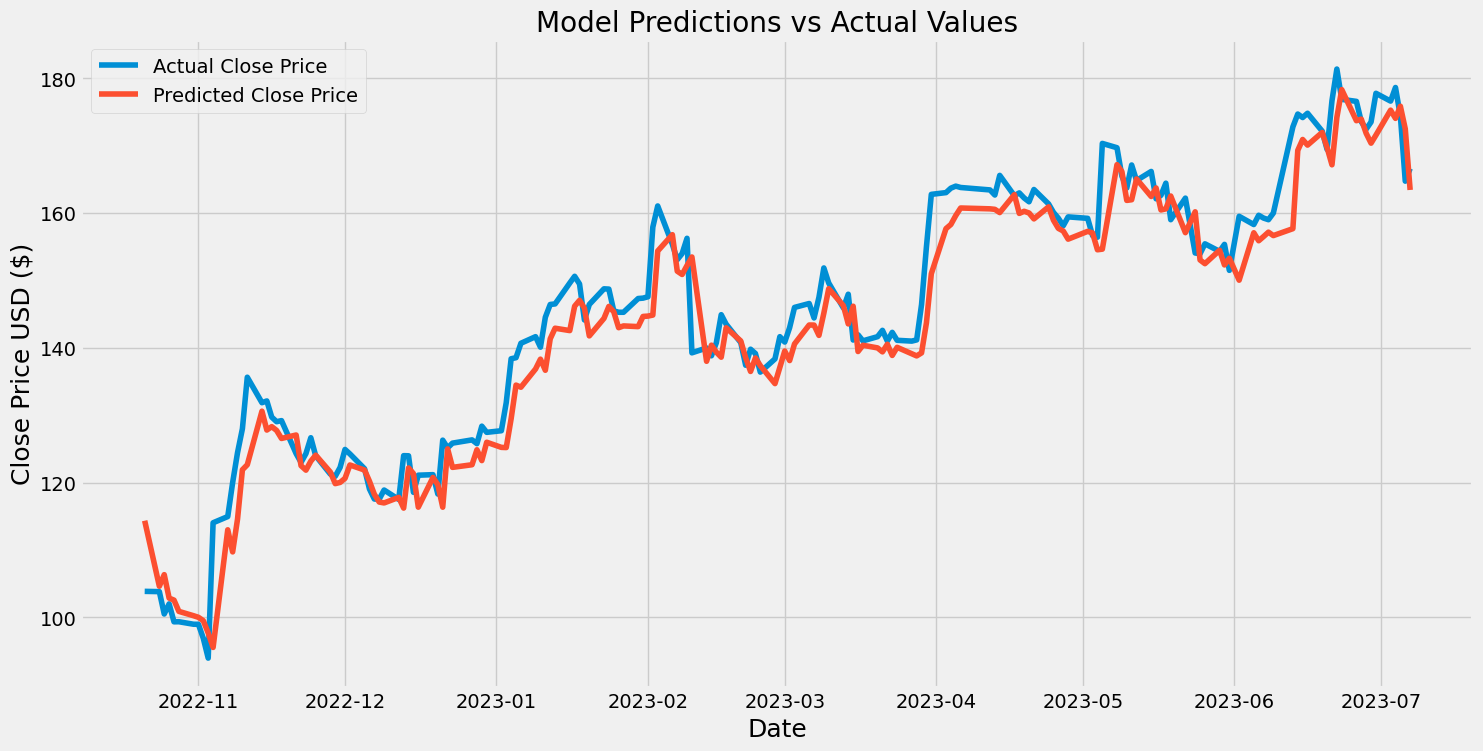

In [ ]:
# Plot comparing lstm predictions and actual values
plt.figure(figsize=(16, 8))
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid['Close'], label='Actual Close Price')
plt.plot(valid['Predictions'], label='Predicted Close Price')
plt.legend()
plt.show()

In [32]:
# Linear Regression
linear_reg_model = LinearRegression()
x_train_linear = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
linear_reg_model.fit(x_train_linear, y_train)

x_test_linear = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))
predictions_linear = linear_reg_model.predict(x_test_linear)
predictions_linear = scaler.inverse_transform(predictions_linear.reshape(-1, 1))

In [33]:
predictions_linear

array([[112.62105201],
       [104.2854089 ],
       [102.96390118],
       [102.1503477 ],
       [101.30423322],
       [100.54632956],
       [ 99.31391617],
       [ 97.94571222],
       [ 99.34263953],
       [ 96.97519107],
       [ 93.48408947],
       [113.83337457],
       [113.51328426],
       [118.6233221 ],
       [125.17067583],
       [125.7613007 ],
       [133.23038762],
       [133.1370964 ],
       [128.90527063],
       [129.46450607],
       [127.0884168 ],
       [129.91547722],
       [127.24653205],
       [119.67903624],
       [123.71977231],
       [126.71036813],
       [122.86830789],
       [119.42430303],
       [118.42496712],
       [121.57845859],
       [125.77456293],
       [123.28046418],
       [121.79342754],
       [117.07063233],
       [117.26447182],
       [118.2328693 ],
       [119.06014536],
       [117.54796492],
       [123.73574349],
       [124.80069385],
       [117.21047401],
       [119.93547266],
       [120.56490757],
       [117

In [34]:
train = data[:training_data_len]

valid_lr = data[training_data_len:]

valid_lr['predictions_linear'] = predictions_linear

<ipython-input-34-90a3f50f9264>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_lr['predictions_linear'] = predictions_linear


In [35]:
valid_lr

,Close,predictions_linear
Date,,
2022-10-21,103.860001,112.621052
2022-10-24,103.820000,104.285409
2022-10-25,100.500000,102.963901
2022-10-26,102.000000,102.150348
2022-10-27,99.339996,101.304233
...,...,...
2023-07-03,176.619995,178.554706
2023-07-04,178.639999,176.377847
2023-07-05,174.419998,178.216862


In [36]:
#Calculate the Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, predictions_linear)
print("Mean Squared Error (MSE):", lr_mse)

Mean Squared Error (MSE): 18.217460009134477


In [37]:
# Calculate RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_linear))
print(f'RMSE for Linear Regression: {rmse_lr}')

RMSE for Linear Regression: 4.268191655623547


In [38]:
from sklearn.metrics import r2_score

# Calculate R-squared value
lr_r2 = r2_score(y_test, predictions_linear)
print("R-squared (R2) Value:", r2)

R-squared (R2) Value: 0.9366660429509612


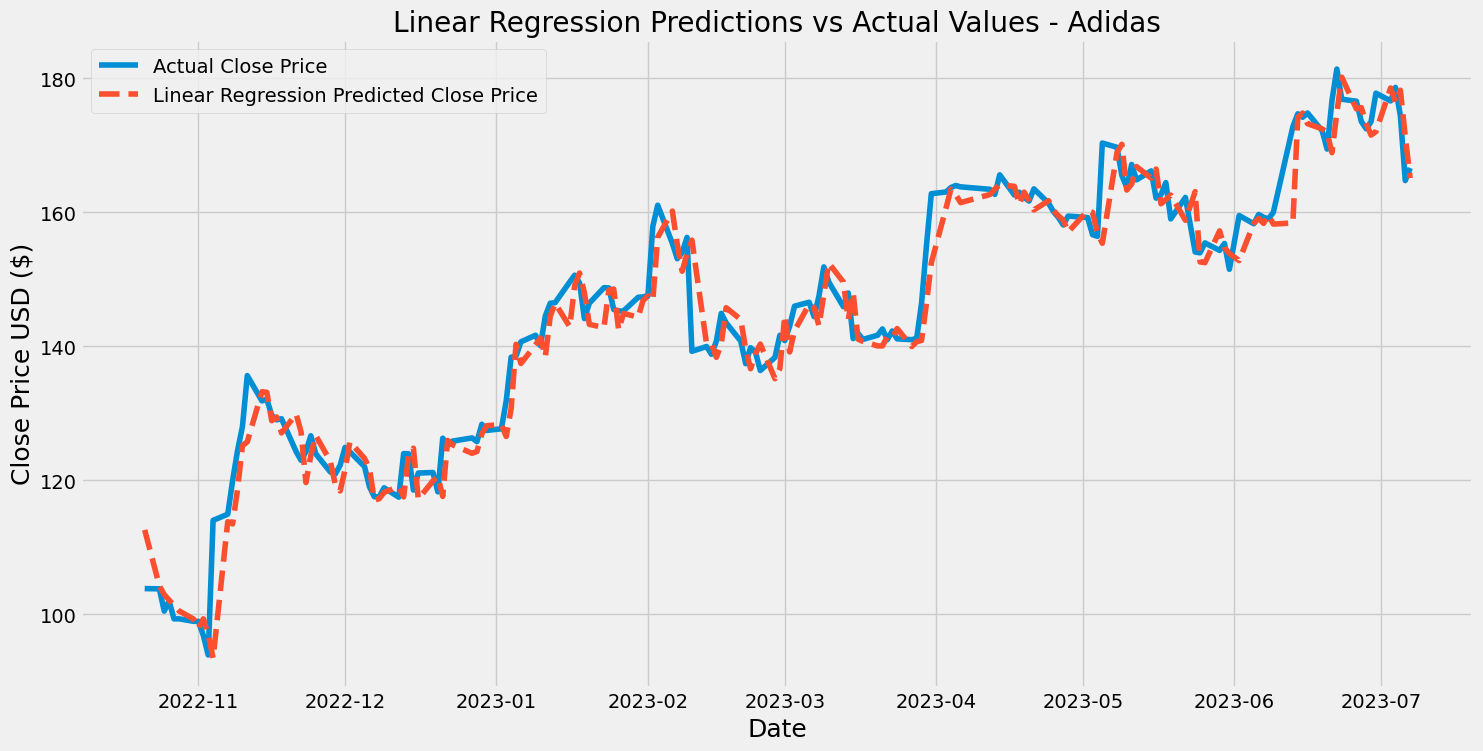

In [40]:
# Plot the actual closing prices and linear regression predictions
plt.figure(figsize=(16, 8))
plt.title('Linear Regression Predictions vs Actual Values - Adidas')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid['Close'], label='Actual Close Price')
plt.plot(valid.index, predictions_linear, label='Linear Regression Predicted Close Price', linestyle='dashed')
plt.legend()
plt.show()

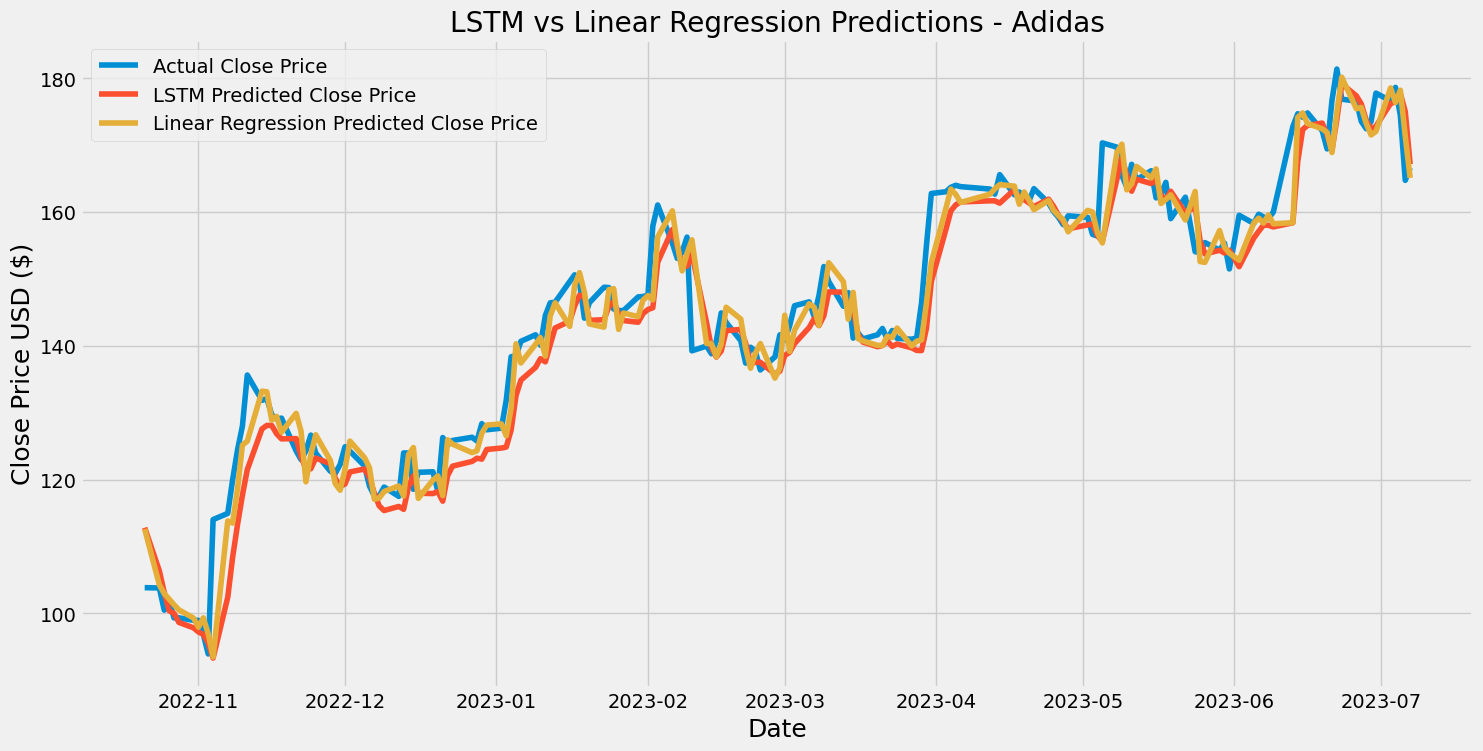

In [41]:
# Plot the data and predictions for both models
plt.figure(figsize=(16, 8))
plt.title('LSTM vs Linear Regression Predictions - Adidas')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid['Close'], label='Actual Close Price')
plt.plot(valid.index, predictions, label='LSTM Predicted Close Price')
plt.plot(valid.index, predictions_linear, label='Linear Regression Predicted Close Price')
plt.legend()
plt.show()

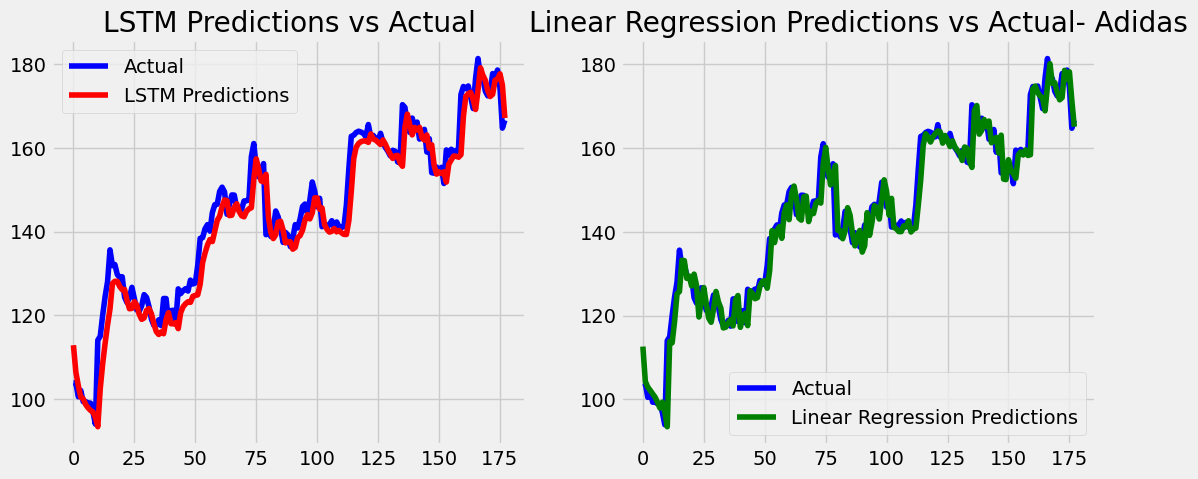

In [45]:
import matplotlib.pyplot as plt

# Assuming you have actual values and predictions for LSTM and Linear Regression
# Replace y_actual with your actual target values and y_pred_lstm and y_pred_lr with predictions
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for LSTM
ax1.set_title('LSTM Predictions vs Actual')
ax1.plot(y_test, label='Actual', color='blue')
ax1.plot(predictions, label='LSTM Predictions', color='red')
ax1.legend()

# Plot for Linear Regression
ax2.set_title('Linear Regression Predictions vs Actual- Adidas')
ax2.plot(y_test, label='Actual', color='blue')
ax2.plot(predictions_linear, label='Linear Regression Predictions', color='green')
ax2.legend()

plt.show()


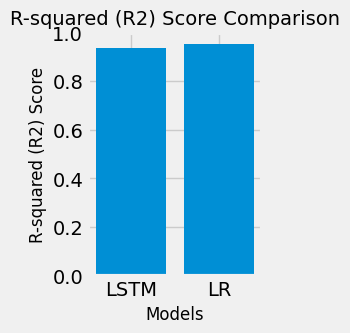

In [63]:
# Create a bar plot to visualize R2 scores
models = ['LSTM', 'LR']
r2_scores = [r2, lr_r2]

plt.figure(figsize=(2, 3))
plt.bar(models, r2_scores)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R-squared (R2) Score', fontsize=12)
plt.title('R-squared (R2) Score Comparison', fontsize=14)
plt.ylim(0, 1.0)  # Set the y-axis range from 0 to 1
plt.show()


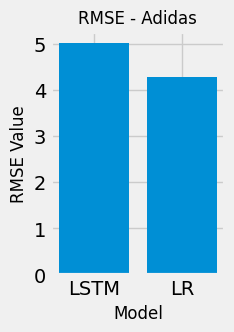

In [65]:


models = ['LSTM', 'LR']
rmse_values = [rmse_lstm, rmse_lr]

plt.figure(figsize=(2, 3))
plt.bar(models, rmse_values)
plt.title('RMSE - Adidas',fontsize=12)
plt.xlabel('Model',fontsize=12)
plt.ylabel('RMSE Value',fontsize=12)
plt.show()


In [ ]:


# Calculate basic statistics
basic_stats = df.describe()

# Calculate the mean of the 'Close' column
mean_close = df['Close'].mean()

# Calculate the standard deviation of the 'Close' column
std_dev_close = df['Close'].std()



# Print or use the results as needed
print("Basic Statistics:")
print(basic_stats)
print("\nMean of 'Close':", mean_close)
print("Standard Deviation of 'Close':", std_dev_close)


In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

In [ ]:
# Define the start and end dates for the historical data
start_date = "2020-01-01"
end_date = "2023-07-10"

# Fetch historical data using yfinance
Ads_quote= yf.download(ticker_symbol, start=start_date, end=end_date)

#Create a new dataframe

new_df = Ads_quote.filter(['Close'])

#Get teh last 60 day closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

#Scale the data to be values between and 1

last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list

X_test =  []

#Append teh past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array

X_test = np.array(X_test)

#Reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price

pred_price = model.predict(X_test)

#undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

In [ ]:
start_date = "2023-07-10"
end_date = "2023-07-11"

# Fetch historical data using yfinance
Ads_quote2= yf.download(ticker_symbol, start=start_date, end=end_date)

print(Ads_quote2['Close'])